<a href="https://colab.research.google.com/github/dpcks/playdata/blob/main/DeepLearning/11_%EC%A6%9D%EA%B0%95(Data_augmentation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 이미지 분류를 위한 데이터 증강(Data augmentation)
- 학습에 사용할 이미지 데이터에 양을 늘리기 위해 원본에 각종 변환을 적용하여 증강시키는 기법
- 원본데이터를 학습 했다가 좌우로 반전된 이미지를 학습했다가 요런식으로 증강


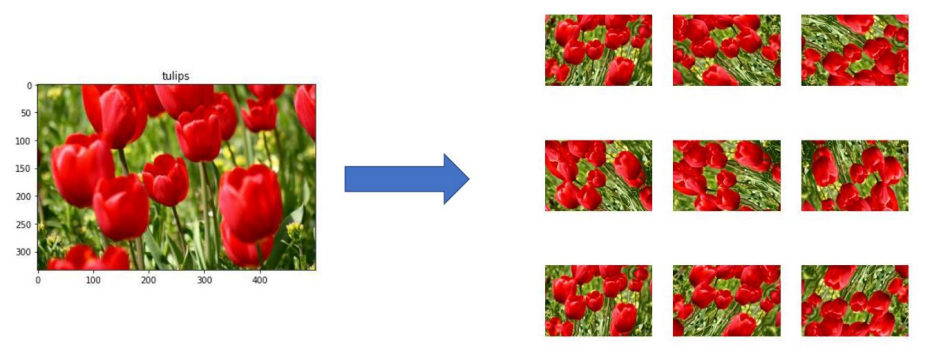

In [ ]:
import pandas as pd
import numpy as np
import torch
from tqdm.auto import tqdm
import random # 시드 고정을 위해
import os # 시드 고정을 위해

def reset_seeds(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)    # 파이썬 환경변수 시드 고정
    np.random.seed(seed)
    torch.manual_seed(seed) # cpu 연산 무작위 고정
    torch.cuda.manual_seed(seed) # gpu 연산 무작위 고정
    torch.backends.cudnn.deterministic = True  # cuda 라이브러리에서 Deterministic(결정론적)으로 예측하기 (예측에 대한 불확실성 제거 )

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

# 데이터경로를 변경하시오

In [ ]:
DATA_PATH = "/content/drive/MyDrive/딥러닝/data/"
SEED = 42

# 구글 드라이브 마운트

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 데이터 복사및 압축풀기

In [ ]:
if not os.path.isdir("train"):
    !cp "{DATA_PATH}cats_and_dogs.zip" "cats_and_dogs.zip"
    !unzip -qq "cats_and_dogs.zip" 

# 이미지 파일 경로 리스트에 담기

In [ ]:
from glob import glob
cats_list = sorted(glob("train/cats/*.jpg"),key= lambda x : x)  
dogs_list = sorted(glob("train/dogs/*.jpg"),key= lambda x : x)
len(cats_list) , len(dogs_list) , cats_list[:5]

(1000,
 1000,
 ['train/cats/cat.0.jpg',
  'train/cats/cat.1.jpg',
  'train/cats/cat.10.jpg',
  'train/cats/cat.100.jpg',
  'train/cats/cat.101.jpg'])

# 학습 이미지경로 및 정답데이터 생성

In [ ]:
img_path = cats_list + dogs_list 
labels = [0] * len(cats_list) + [1] * len(dogs_list)

len(img_path) , len(labels) , img_path[:5]

(2000,
 2000,
 ['train/cats/cat.0.jpg',
  'train/cats/cat.1.jpg',
  'train/cats/cat.10.jpg',
  'train/cats/cat.100.jpg',
  'train/cats/cat.101.jpg'])

# 섞기

In [ ]:
train = np.array(img_path,dtype="object")
target = np.array(labels)

np.random.seed(SEED) 
index_list = np.arange(train.shape[0]) 
np.random.shuffle(index_list) 
np.random.shuffle(index_list) 

train = train[index_list] 
target = target[index_list]

target[:10]

array([1, 1, 0, 1, 0, 1, 1, 0, 1, 1])

In [ ]:
train[:10]

array(['train/dogs/dog.900.jpg', 'train/dogs/dog.314.jpg',
       'train/cats/cat.232.jpg', 'train/dogs/dog.0.jpg',
       'train/cats/cat.567.jpg', 'train/dogs/dog.506.jpg',
       'train/dogs/dog.435.jpg', 'train/cats/cat.35.jpg',
       'train/dogs/dog.410.jpg', 'train/dogs/dog.25.jpg'], dtype=object)

In [ ]:
img_path = train[2]
img_path

'train/cats/cat.232.jpg'

In [ ]:
from PIL import Image

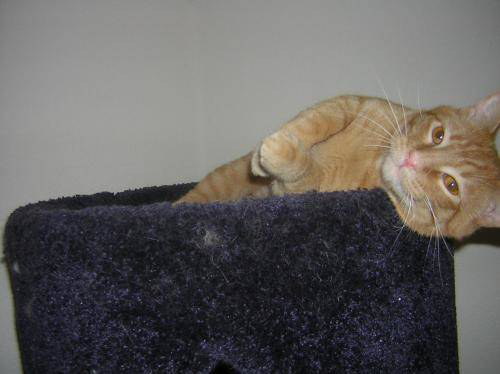

In [ ]:
pil_img = Image.open(img_path)
pil_img

# torchvision 라이브러리의 transforms
- PyTorch의 torchvision 라이브러리는 transforms 에서 다양한 이미지 변환 기능 제공


In [ ]:
import torchvision.transforms as transforms

## ToTensor
- 이미지 데이터를 C x H x W 형태의 텐서로 변환해준다.
- PIL 객체 또는 ndarray 를 넣을수 있다. (단 넘파이는 uint8 형태로 넣어줘야함 )
- 민맥스 스케일링 까지 해줌


In [ ]:
np.array(pil_img).shape

(374, 500, 3)

In [ ]:
torch_transform = transforms.ToTensor()
torch_transform(pil_img).shape

torch.Size([3, 374, 500])

In [ ]:
torch_transform(pil_img) # 민맥스 스케일링까지해줌

tensor([[[0.4471, 0.4549, 0.4627,  ..., 0.4039, 0.4000, 0.3961],
         [0.4510, 0.4588, 0.4667,  ..., 0.4078, 0.4039, 0.4000],
         [0.4510, 0.4588, 0.4667,  ..., 0.4157, 0.4118, 0.4078],
         ...,
         [0.4196, 0.4196, 0.4235,  ..., 0.3686, 0.3686, 0.3686],
         [0.4157, 0.4157, 0.4196,  ..., 0.3647, 0.3647, 0.3647],
         [0.4157, 0.4157, 0.4196,  ..., 0.3647, 0.3647, 0.3647]],

        [[0.4471, 0.4549, 0.4627,  ..., 0.4118, 0.4078, 0.4039],
         [0.4510, 0.4588, 0.4667,  ..., 0.4157, 0.4118, 0.4078],
         [0.4510, 0.4588, 0.4667,  ..., 0.4235, 0.4196, 0.4157],
         ...,
         [0.4353, 0.4353, 0.4392,  ..., 0.3765, 0.3765, 0.3765],
         [0.4314, 0.4314, 0.4353,  ..., 0.3725, 0.3725, 0.3725],
         [0.4314, 0.4314, 0.4353,  ..., 0.3725, 0.3725, 0.3725]],

        [[0.4471, 0.4549, 0.4627,  ..., 0.4078, 0.4039, 0.4000],
         [0.4510, 0.4588, 0.4667,  ..., 0.4118, 0.4078, 0.4039],
         [0.4510, 0.4588, 0.4667,  ..., 0.4196, 0.4157, 0.

In [ ]:
arr = np.array(pil_img)
torch_transform(arr)

tensor([[[0.4471, 0.4549, 0.4627,  ..., 0.4039, 0.4000, 0.3961],
         [0.4510, 0.4588, 0.4667,  ..., 0.4078, 0.4039, 0.4000],
         [0.4510, 0.4588, 0.4667,  ..., 0.4157, 0.4118, 0.4078],
         ...,
         [0.4196, 0.4196, 0.4235,  ..., 0.3686, 0.3686, 0.3686],
         [0.4157, 0.4157, 0.4196,  ..., 0.3647, 0.3647, 0.3647],
         [0.4157, 0.4157, 0.4196,  ..., 0.3647, 0.3647, 0.3647]],

        [[0.4471, 0.4549, 0.4627,  ..., 0.4118, 0.4078, 0.4039],
         [0.4510, 0.4588, 0.4667,  ..., 0.4157, 0.4118, 0.4078],
         [0.4510, 0.4588, 0.4667,  ..., 0.4235, 0.4196, 0.4157],
         ...,
         [0.4353, 0.4353, 0.4392,  ..., 0.3765, 0.3765, 0.3765],
         [0.4314, 0.4314, 0.4353,  ..., 0.3725, 0.3725, 0.3725],
         [0.4314, 0.4314, 0.4353,  ..., 0.3725, 0.3725, 0.3725]],

        [[0.4471, 0.4549, 0.4627,  ..., 0.4078, 0.4039, 0.4000],
         [0.4510, 0.4588, 0.4667,  ..., 0.4118, 0.4078, 0.4039],
         [0.4510, 0.4588, 0.4667,  ..., 0.4196, 0.4157, 0.

## Resize

In [ ]:
# [
#     "증강하는객체"
#     Resize([150,150]),
#     ToTensor()
# ]

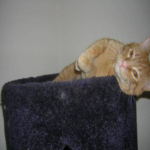

In [ ]:
torch_transform = transforms.Resize([150,150]) 
torch_transform(pil_img)

## RandomHorizontalFlip
- p 파라미터 확률로 좌우반전 
- p = 0~1 사이로 주면됨!
- 좌우 반전은 무조건 학습 효과있음

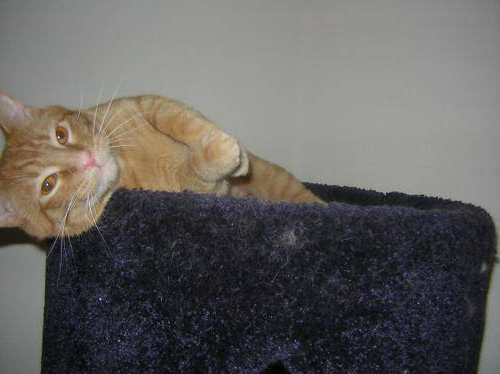

In [ ]:
torch_transform = transforms.RandomHorizontalFlip(p=1) # 좌우반전된걸 100퍼센트 보여줄려고 1을줌 원래는 1을주면안됨 보여주기위해서 1을줌
torch_transform(pil_img)

## RandomVerticalFlip
- p 파라미터 확률로 상하반전 

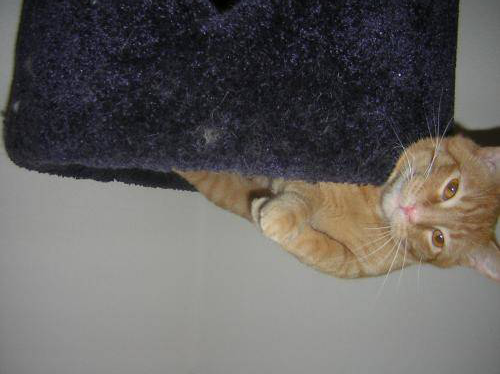

In [ ]:
torch_transform = transforms.RandomVerticalFlip(p=1) 
torch_transform(pil_img)

## RandomGrayscale
- p 파라미터 확률로 흑백이미지로 변환

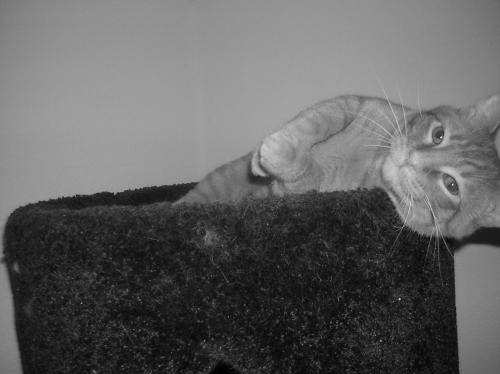

In [ ]:
torch_transform = transforms.RandomGrayscale(p=1) 
torch_transform(pil_img)

## RandomPerspective
- p 파라미터 확률로 원근변환(3차원으로 랜덤하게 뒤틀기)


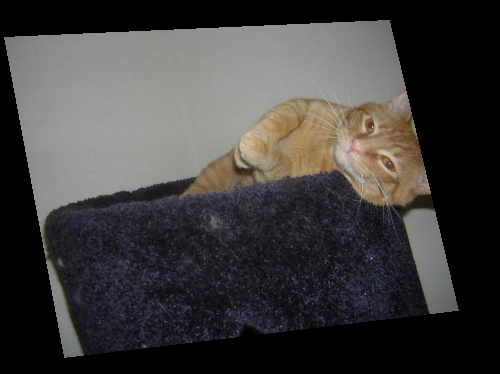

In [ ]:
torch_transform = transforms.RandomPerspective(p=1,distortion_scale=0.5,fill=0)  #distortion_scale 왜곡정도 0~1까지 1에 가까울수록 많이 비틀어짐 비틀면 주변이 빌수밖에없음 fill로 채움 0은 검정 255는 하얀색
torch_transform(pil_img)

## RandomInvert
- p 파라미터 확률로 색상반전

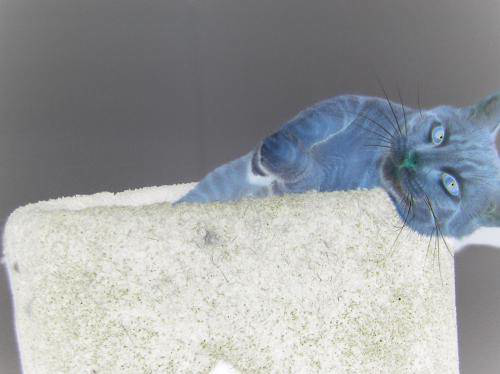

In [ ]:
torch_transform = transforms.RandomInvert(p=1) 
torch_transform(pil_img)

## RandomPosterize
- p 파라미터 확률로 포스터화 


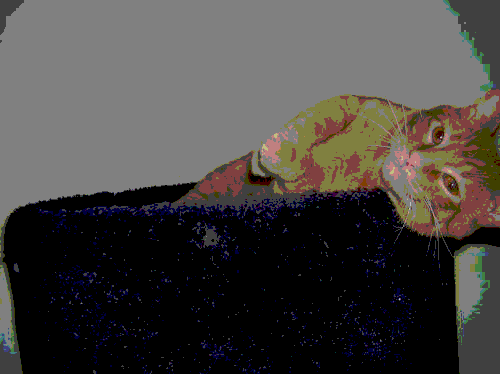

In [ ]:
torch_transform = transforms.RandomPosterize(bits=2,p=1) # bits 0~8 사이값을 줌 0에 가까워질수록 포스터화가 심해짐
torch_transform(pil_img)

## RandomEqualize
- p 파라미터 확률로 이미지 히스토그램을 균등화 
- 밝은 곳은 발게해주고 어두운곳은 더 어둡게 해주는 특징
- 색상에 따라 선명해지는 것도 있음 (엣지)

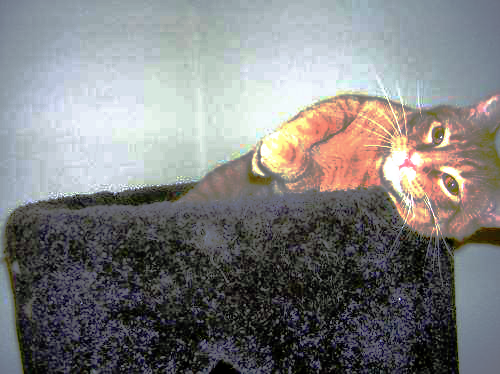

In [ ]:
torch_transform = transforms.RandomEqualize(p=1) 
torch_transform(pil_img)

- 여기서부터는 p파라미터없이 무조건 변환!!!

## CenterCrop
- 지정한 사이즈로 center crop

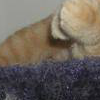

In [ ]:
torch_transform = transforms.CenterCrop([100,100]) 
torch_transform(pil_img)

## RandomResizedCrop
- 랜덤으로 crop 후에 지정된 크기로 리사이징
- size: 랜덤으로 crop 후 리사이즈 크기
- scale : crop 면적에 대한 하한, 상한 값

    
    

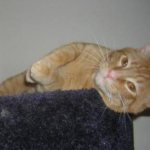

In [ ]:
torch_transform = transforms.RandomResizedCrop([150,150] ,scale=[0.1, 0.9]) # 스케일부분이 랜덤요소
torch_transform(pil_img)

## RandomAffine
- 아핀변환
- 2차원으로 뒤틀기
- degrees : 각도의 범위
- scale : 아핀변환후 크기를 크기 조절 범위
- fill: 채울값


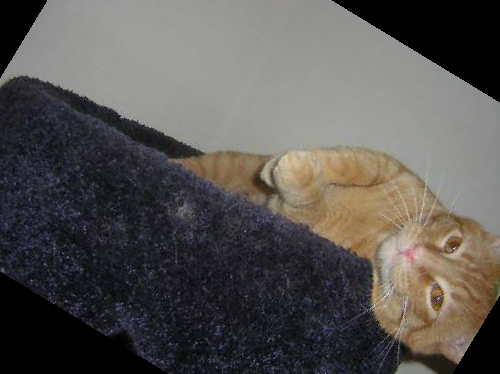

In [ ]:
torch_transform = transforms.RandomAffine(degrees=(20,50),scale=(0.8, 1.2),fill=0) # degrees 스칼라값도 가능 
torch_transform(pil_img)

- p파라미터없는 것들을 p 파라미터확률을 사용하는법


## RandomApply
- p 파라미터 확률로 첫번째 인수로 받은 transform 객체들을 실행한다.

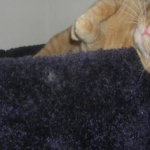

In [ ]:
transform = transforms.RandomResizedCrop([150,150] ,scale=[0.1, 0.9])
torch_transform = transforms.RandomApply([transform], p=1)
torch_transform(pil_img)

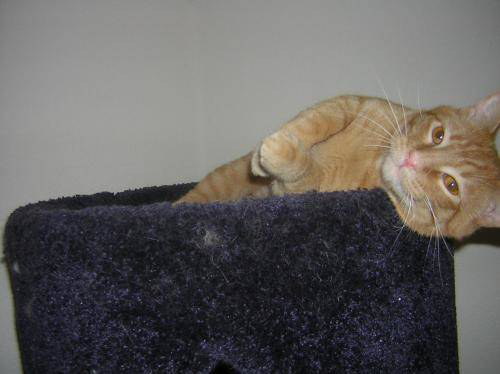

In [ ]:
transform1 = transforms.RandomResizedCrop([150,150] ,scale=[0.1, 1.0])
transform2 = transforms.RandomAffine(degrees=50,scale=(0.8, 1.2),fill=0)
torch_transform = transforms.RandomApply([transform1,transform2], p=0.5) # p = 0.5 경우 둘다 적용되거나 안되거나
torch_transform(pil_img)

## Compose
- 여러 단계로 변환해야하는 경우 transforms 객체들을 묶을수있다.


In [ ]:
lst = [
    transforms.Resize([150,150]),
    transforms.RandomVerticalFlip(p=1),
    transforms.ToTensor()
    ]
transform = transforms.Compose(lst)
transform(pil_img).shape

torch.Size([3, 150, 150])

In [ ]:
target = target.reshape(-1,1)
target.shape

(2000, 1)

# transforms 객체 생성

In [ ]:
# 보통 train, test 나눠서 transforms 생성 
train_lst = [
    transforms.Resize([150,150]),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
    ]
train_transform = transforms.Compose(train_lst)

test_lst = [
    transforms.Resize([150,150]),
    transforms.ToTensor()
    ] # test는 랜덤하게 돌릴 필요가없음.
test_transform = transforms.Compose(test_lst)

# 데이터셋

In [ ]:
class CatDogDataset(torch.utils.data.Dataset):
    def __init__(self ,transform , x, y = None ): 
        self.x = x
        self.y = y
        self.transform = transform
    def __len__(self): 
        return self.x.shape[0]
    def __getitem__(self, idx): 
        item = {}
        x = Image.open(self.x[idx])
        item["x"] = self.transform(x)
        if self.y is not None:
            item["y"] = torch.Tensor(self.y[idx])
        return item   

In [ ]:
dt = CatDogDataset(train_transform,train,target)
dl = torch.utils.data.DataLoader(dt, batch_size = 3 , shuffle=False)
batch = next(iter(dl))
batch

{'x': tensor([[[[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
           [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
           [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
           ...,
           [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
           [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
           [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],
 
          [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
           [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
           [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
           ...,
           [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
           [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
           [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],
 
          [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
           [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
           [1.0000,

# Conv2d 와 Pool2d 레이어

In [ ]:
class Conv2dNet(torch.nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size):
        super().__init__()
        self.conv = torch.nn.Conv2d(in_channels, out_channels, kernel_size )
        self.relu = torch.nn.ReLU()
        self.pool = torch.nn.MaxPool2d(2)
        
    def forward(self, x):
        x = self.conv(x)
        x = self.relu(x)
        x = self.pool(x)
        return x  

# 모델

In [ ]:
class Net(torch.nn.Module):
    def __init__(self,in_channels = 3 , out_channels = 16  ,kernel_size = 3): 
        super().__init__()

        self.seq = torch.nn.Sequential(
            Conv2dNet(in_channels, out_channels, kernel_size),
            Conv2dNet(out_channels, out_channels*2, kernel_size),
            Conv2dNet(out_channels*2, out_channels*4, kernel_size),
            Conv2dNet(out_channels*4, out_channels*8, kernel_size),
            torch.nn.AdaptiveAvgPool2d(1), 
            torch.nn.Flatten(), 
            torch.nn.Linear(out_channels*8 , 1),
        )


    def forward(self, x):
        
        x  = self.seq(x)
        return x

In [ ]:
def train_loop(dataloader,model,loss_fn,optimizer,device):
    epoch_loss = 0 
    model.train() 
    for batch in dataloader: 
        pred = model(batch["x"].to(device)) 
        loss = loss_fn(pred, batch["y"].to(device)) 
        
        optimizer.zero_grad() 
        loss.backward()  
        optimizer.step() 
        
        epoch_loss += loss.item() 

    epoch_loss /= len(dataloader) 

    return epoch_loss 

In [ ]:
@torch.no_grad() 
def test_loop(dataloader,model,loss_fn,device): 
    epoch_loss = 0
    model.eval() 

    pred_list = []
    sig = torch.nn.Sigmoid()

    for batch in dataloader:
        
        pred = model(batch["x"].to(device))
        if batch.get("y") is not None: 
            loss = loss_fn(pred, batch["y"].to(device))
            epoch_loss += loss.item()
        
        pred = sig(pred)
        pred = pred.to("cpu").numpy() 
        pred_list.append(pred)

    epoch_loss /= len(dataloader)

    pred = np.concatenate(pred_list) 
    return epoch_loss , pred 

In [ ]:
n_splits = 2
batch_size = 16
epochs = 100
loss_fn = torch.nn.BCEWithLogitsLoss()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
cv = KFold(n_splits=n_splits,shuffle=True, random_state=SEED)

# 학습

In [ ]:
is_holdout = True
reset_seeds(SEED)
best_score_list = []
for i,(tri,vai) in enumerate(cv.split(train)):
    
    model = Net().to(device)
    optimizer = torch.optim.Adam(model.parameters())
    
    train_dt = CatDogDataset(train_transform,train[tri],target[tri])
    valid_dt = CatDogDataset(test_transform,train[vai],target[vai]) # 검증셋은 원본데이터가 랜덤하게 변하면 안됨
    train_dl = torch.utils.data.DataLoader(train_dt, batch_size=batch_size, shuffle=True)
    valid_dl = torch.utils.data.DataLoader(valid_dt, batch_size=batch_size,shuffle=False)

    best_score = 0
    patience = 0

    for epoch in tqdm(range(epochs)):
        
        train_loss = train_loop(train_dl, model, loss_fn,optimizer,device )
        valid_loss , pred = test_loop(valid_dl, model, loss_fn,device  )
        pred = (pred > 0.5).astype(int) 
        
        score = accuracy_score(target[vai],pred )
        print(train_loss,valid_loss,score)
        patience += 1
        if best_score < score:
            patience = 0
            best_score = score
            torch.save(model.state_dict(),f"model_{i}.pth")

        if patience == 5:
            break
    print(f"Fold ({i}), BEST ACC: {best_score}")
    best_score_list.append(best_score)

    if is_holdout:
        break

  0%|          | 0/100 [00:00<?, ?it/s]

0.6941945600509644 0.6921034180201017 0.525
0.6922970330715179 0.6928431666814364 0.4925
0.6904514694213867 0.6945207394086398 0.4925
0.6825035536289215 0.6899780768614548 0.5325
0.6711742079257965 0.6996889756276057 0.4975
0.6639758706092834 0.6585419544806848 0.6075
0.6590944528579712 0.6637086639037499 0.62
0.6382741260528565 0.6524755221146804 0.59
0.6479329526424408 0.7031739583382239 0.5825
0.6300880408287048 0.6487493469164922 0.64
0.623267730474472 0.6376009445924026 0.6275
0.6112101066112519 0.7419698330072256 0.5875
0.6077262043952942 0.668795842390794 0.6275
0.5956471580266952 0.6228177364055927 0.6575
0.5959316653013229 0.6268192437978891 0.66
0.5871634328365326 0.6302017615391657 0.6125
0.5847370338439941 0.6066830249933096 0.6725
0.578661378622055 0.619824991776393 0.69
0.5718619692325592 0.601959439424368 0.6925
0.5717354959249497 0.5845352548819321 0.695
0.5514841848611831 0.6034746582691486 0.6875
0.543382248878479 0.6098863620024461 0.685
0.5476020580530166 0.63756668